In [2]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673243,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373797,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439531,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293462,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068588,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [3]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [4]:
unique_tickers = all_data['Ticker'].unique()
print(unique_tickers)

['INTC' 'AMD' 'NVDA' 'SOXX']


In [5]:
import yfinance as yf

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

nvda_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,923.000000,926.479980,904.049988,914.349976,914.349976,48037200
2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58436500


[*********************100%%**********************]  1 of 1 completed


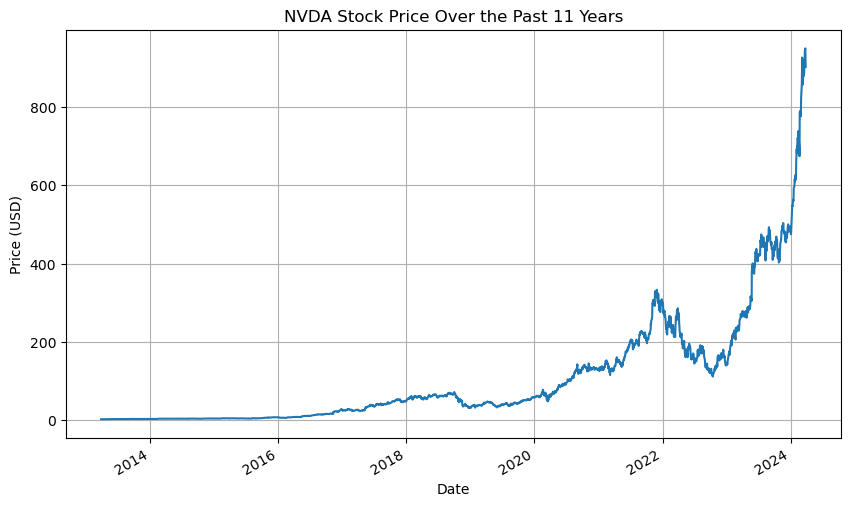

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
nvda_data['Close'].plot()
plt.title('NVDA Stock Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [7]:
# Filter the data for NVDA
nvda_data = all_data[all_data['Ticker'] == 'NVDA']

# Prophet expects the 'Date' and 'Close' columns
nvda_data = nvda_data[['Date', 'Close']]
nvda_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(nvda_data)

# Make a future dataframe for one year past the last available date
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Print the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,211.467259,177.839565,247.831751
2878,2024-03-24,211.541669,177.488083,246.691348
2879,2024-03-25,211.906787,176.866626,247.759640
2880,2024-03-26,211.724907,177.162063,247.030824
2881,2024-03-27,211.521910,177.666847,247.776898


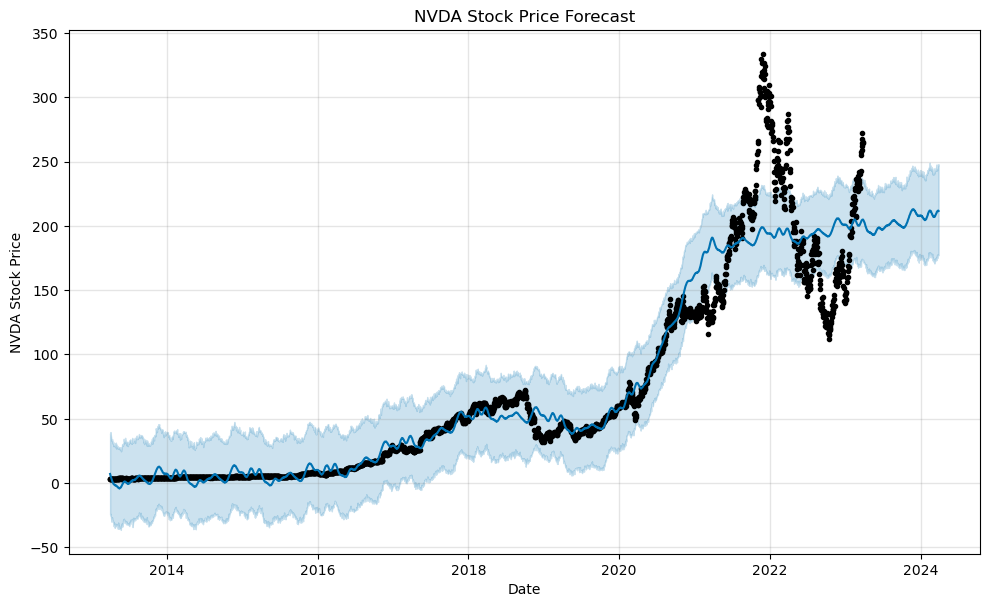

In [8]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('NVDA Stock Price')
plt.title('NVDA Stock Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


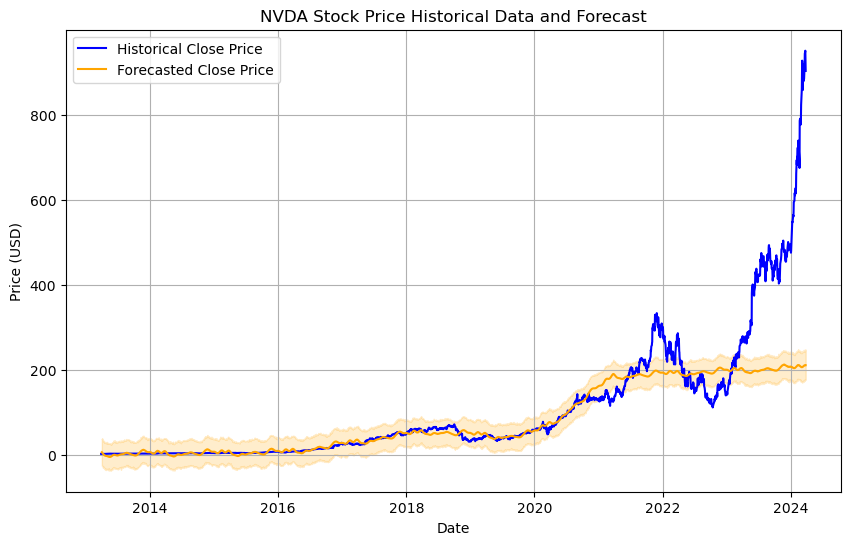

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

# Assume 'model' and 'forecast' are already defined
# Replace this assumption with your actual Prophet model and forecast

# Plot both historical data and forecast
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(nvda_data.index, nvda_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

plt.title('NVDA Stock Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Calculate the percentage change of daily returns for Nvidia
daily_returns_nvidia = nvda_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_nvidia = daily_returns_nvidia.dropna()

# Convert the series of daily returns into a DataFrame for Nvidia
daily_returns_df_nvidia = pd.DataFrame({'Daily_Returns_Nvidia': daily_returns_nvidia})

# Display the DataFrame for Nvidia
daily_returns_df_nvidia

,Daily_Returns_Nvidia
Date,
2013-04-01,-0.032736
2013-04-02,-0.010475
2013-04-03,-0.012215
2013-04-04,0.009893
2013-04-05,0.017143
...,...
2024-03-21,0.011762
2024-03-22,0.031213
2024-03-25,0.007562


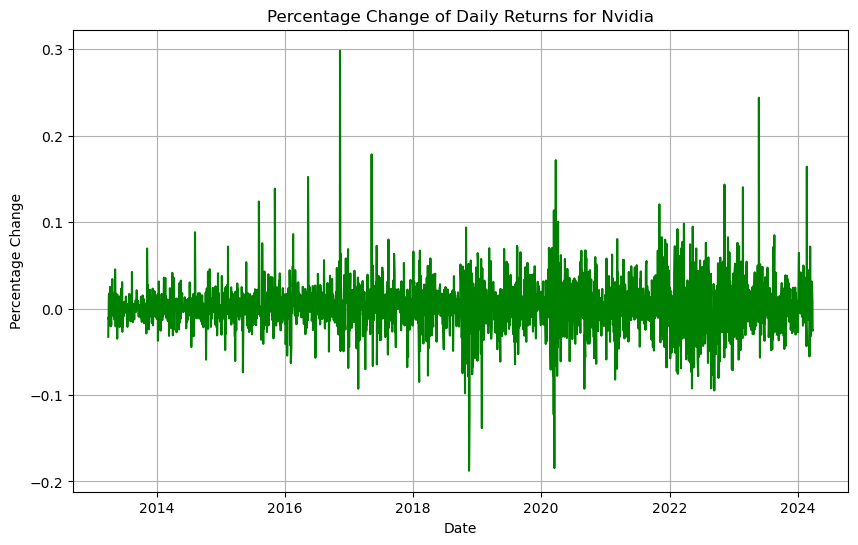

In [13]:
import matplotlib.pyplot as plt

# Calculate the percentage change of daily returns for Nvidia
daily_returns_nvda = nvda_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_nvda = daily_returns_nvda.dropna()

# Plot the percentage change of daily returns for Nvidia
plt.figure(figsize=(10, 6))
plt.plot(daily_returns_nvda.index, daily_returns_nvda.values, color='green')
plt.title('Percentage Change of Daily Returns for Nvidia')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()